In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as linalg
import copy

from sklearn import preprocessing, linear_model,svm
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import f1_score,accuracy_score,classification_report

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

## Methods used

In [2]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    return xx, yy

def plotBoundary(X,Y,model):
    Y = np.asarray(Y)
    X0, X1= X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
#     plt.scatter(X0, X1, c=Y)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plot_decision_regions(X, Y, model, legend=2)
    plt.show()

def printAccuracies(train_acc,test_acc):
    print('TrainAcc:',train_acc,'\t\tTestAcc:', test_acc)

def getNewTrainSet(supportIndices, X, Y):
    new_xTrain_set, new_yTrain_set = [], []
    for i in supportIndices:
        new_xTrain_set.append(X[i])
        new_yTrain_set.append(Y[i])
    return np.asarray(new_xTrain_set),np.asarray(new_yTrain_set)

def trainModel(X, Y,kernel):
    model=svm.SVC(kernel=kernel)
    model.fit(X,Y)
    return model

### IRIS Dataset

In [3]:
data=pd.read_csv(r"C:\Users\Subhani\Documents\Jupyter AML\Assignments\Assignment_2\iris\iris-species\iris.csv")
data_classes={'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}

data_X=data.iloc[:,1:5].values
data_X=data.iloc[:,1:3].values ######## taken first 2 features
data_Y_names=data.iloc[:,5].values

data_Y=[]
for i in data_Y_names:
    data_Y.append(data_classes[i])

dataX_train, dataX_test, dataY_train, dataY_test = train_test_split(data_X, data_Y, test_size=0.2,random_state=20)

dataX_train.shape

(120, 2)

### Linear Kernel

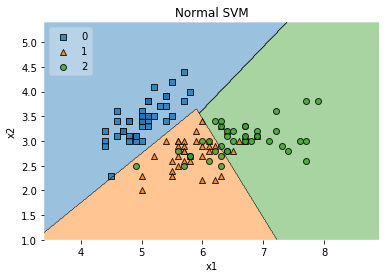

TrainAcc: 0.8416666666666667 		TestAcc: 0.7333333333333333


In [4]:
linearModel = svm.SVC(kernel='linear')
linearModel.fit(dataX_train, dataY_train)
yPred = linearModel.predict(dataX_test)

X = dataX_train
Y = np.asarray(dataY_train)

plt.title('Normal SVM')
plotBoundary(X,Y,linearModel)

trainScore = linearModel.score(dataX_train, dataY_train)
# testScore = linearModel.score(dataX_test, dataY_test)

train_accuracy = accuracy_score(dataY_train, linearModel.predict(dataX_train))
test_accuracy = accuracy_score(dataY_test, linearModel.predict(dataX_test))
printAccuracies(train_accuracy,test_accuracy)

In [5]:
len(linearModel.support_vectors_)

64

### Online SVM

In [6]:
online_data_X=copy.deepcopy(dataX_train)
online_data_Y=copy.deepcopy(dataY_train)
X_train, X_test, Y_train, Y_test = train_test_split(dataX_train, dataY_train, test_size=0.4,random_state=20)

-------------------------------------


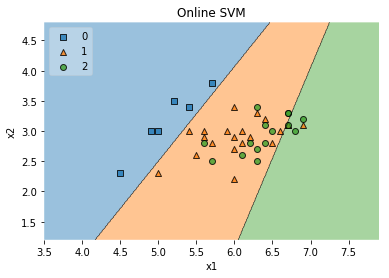

TrainAcc: 0.775 		TestAcc: 0.6666666666666666
-------------------------------------


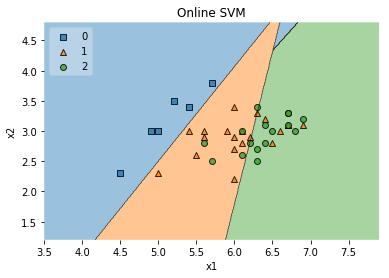

TrainAcc: 0.825 		TestAcc: 0.7
-------------------------------------


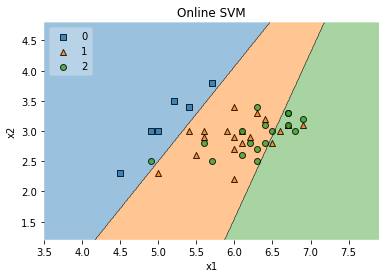

TrainAcc: 0.7666666666666667 		TestAcc: 0.6333333333333333
-------------------------------------


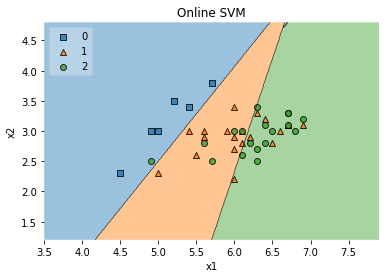

TrainAcc: 0.8333333333333334 		TestAcc: 0.7333333333333333
-------------------------------------


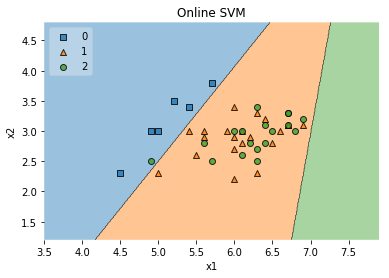

TrainAcc: 0.7583333333333333 		TestAcc: 0.6666666666666666
-------------------------------------


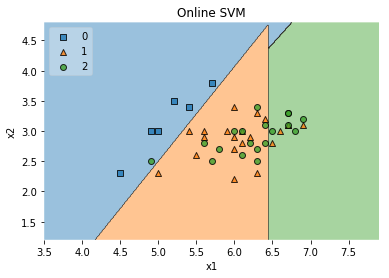

TrainAcc: 0.7916666666666666 		TestAcc: 0.7
-------------------------------------


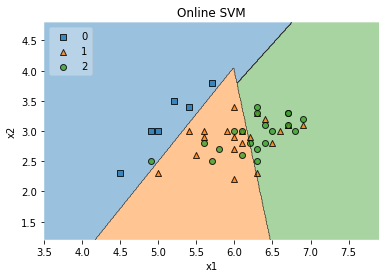

TrainAcc: 0.8416666666666667 		TestAcc: 0.7
-------------------------------------


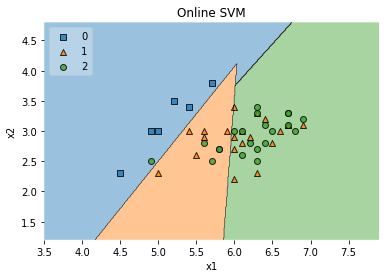

TrainAcc: 0.8083333333333333 		TestAcc: 0.7
-------------------------------------


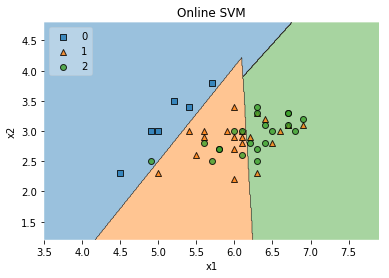

TrainAcc: 0.8416666666666667 		TestAcc: 0.7


In [7]:
onlineModel = trainModel(X_train, Y_train,'linear')

search_X=X_train
search_Y=Y_train
for i in range(0,len(X_test)):
    pred=onlineModel.predict(X_test[i].reshape(1,2))
    if(pred == Y_test[i]):
        continue
    else:
        print('-------------------------------------')
        dataX_train_new, dataY_train_new = getNewTrainSet(onlineModel.support_, search_X, search_Y)
        
        point_X = np.asarray(X_test[i]).reshape(1,2)
        dataX_train_new=np.append(dataX_train_new,point_X,axis=0)
        
        point_Y=np.asarray([Y_test[i]])
        dataY_train_new=copy.deepcopy(np.append(dataY_train_new,point_Y))
        
        onlineModel=trainModel(dataX_train_new, dataY_train_new,'linear')
        
        plt.title('Online SVM')
        plotBoundary(dataX_train_new,dataY_train_new,onlineModel)
        
        train_accuracy = accuracy_score(dataY_train, onlineModel.predict(dataX_train))
        test_accuracy = accuracy_score(dataY_test, onlineModel.predict(dataX_test))
        printAccuracies(train_accuracy,test_accuracy)

        search_X=dataX_train_new
        search_Y=dataY_train_new

In [8]:
len(onlineModel.support_vectors_)

49

In [9]:
train_accuracy = accuracy_score(dataY_train, onlineModel.predict(dataX_train))
test_accuracy = accuracy_score(dataY_test, onlineModel.predict(dataX_test))
printAccuracies(train_accuracy,test_accuracy)

TrainAcc: 0.8416666666666667 		TestAcc: 0.7


### RBF Kernel

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


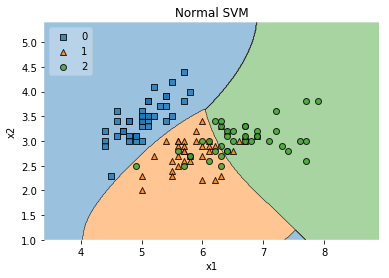

TrainAcc: 0.8416666666666667 		TestAcc: 0.7333333333333333


In [10]:
rbfModel = svm.SVC(kernel='rbf')
rbfModel.fit(dataX_train, dataY_train)
yPred = rbfModel.predict(dataX_test)

X = dataX_train
Y = np.asarray(dataY_train)

plt.title('Normal SVM')
plotBoundary(X,Y,rbfModel)

trainScore = rbfModel.score(dataX_train, dataY_train)
# testScore = linearModel.score(dataX_test, dataY_test)

train_accuracy = accuracy_score(dataY_train, rbfModel.predict(dataX_train))
test_accuracy = accuracy_score(dataY_test, rbfModel.predict(dataX_test))
printAccuracies(train_accuracy,test_accuracy)

In [11]:
len(rbfModel.support_vectors_)

66

### Online SVM

In [12]:
online_data_X=copy.deepcopy(dataX_train)
online_data_Y=copy.deepcopy(dataY_train)

X_train, X_test, Y_train, Y_test = train_test_split(dataX_train, dataY_train, test_size=0.4,random_state=20)

In [13]:
onlineModel = trainModel(X_train, Y_train,'rbf')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


-------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


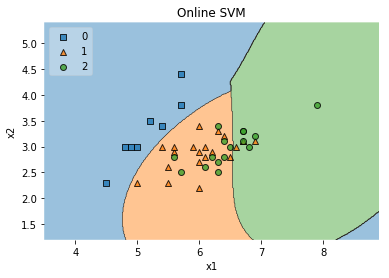

TrainAcc: 0.7833333333333333 		TestAcc: 0.6333333333333333
-------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


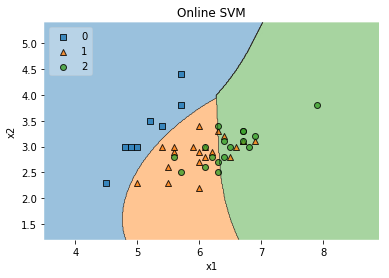

TrainAcc: 0.825 		TestAcc: 0.7
-------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


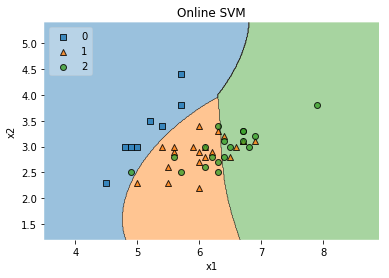

TrainAcc: 0.8166666666666667 		TestAcc: 0.7
-------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


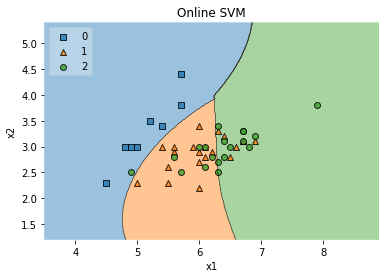

TrainAcc: 0.8416666666666667 		TestAcc: 0.7333333333333333
-------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


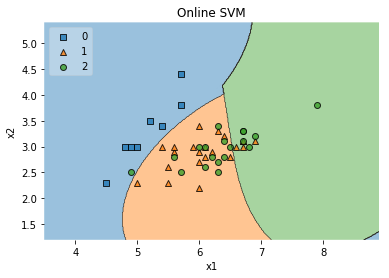

TrainAcc: 0.7833333333333333 		TestAcc: 0.6333333333333333
-------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


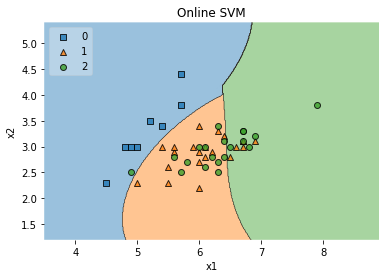

TrainAcc: 0.7916666666666666 		TestAcc: 0.7
-------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


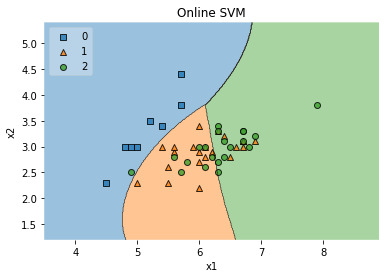

TrainAcc: 0.8583333333333333 		TestAcc: 0.7
-------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


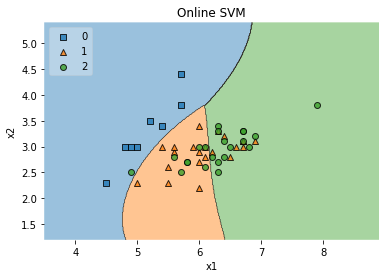

TrainAcc: 0.85 		TestAcc: 0.7


In [14]:
search_X=X_train
search_Y=Y_train
for i in range(0,len(X_test)):
    pred=onlineModel.predict(X_test[i].reshape(1,2))
    if(pred == Y_test[i]):
        continue
    else:
        print('-------------------------------------')
        dataX_train_new, dataY_train_new = getNewTrainSet(onlineModel.support_, search_X, search_Y)
        
        point_X = np.asarray(X_test[i]).reshape(1,2)
        dataX_train_new=np.append(dataX_train_new,point_X,axis=0)
        
        point_Y=np.asarray([Y_test[i]])
        dataY_train_new=copy.deepcopy(np.append(dataY_train_new,point_Y))
        
        onlineModel=trainModel(dataX_train_new, dataY_train_new,'rbf')
        
        plt.title('Online SVM')
        plotBoundary(dataX_train_new,dataY_train_new,onlineModel)
        
        train_accuracy = accuracy_score(dataY_train, onlineModel.predict(dataX_train))
        test_accuracy = accuracy_score(dataY_test, onlineModel.predict(dataX_test))
        printAccuracies(train_accuracy,test_accuracy)

        search_X=dataX_train_new
        search_Y=dataY_train_new